<a href="https://colab.research.google.com/github/melina77/Los-Angeles-Crime-Data-Analysis/blob/Google-Colab/Melina_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAPD Data Analysis-Comparing 2010 to 2020




In [ ]:
#Installing needed libraries (only need to install once)

#tensorflow
!pip install --upgrade tensorflow_hub

import tensorflow_hub as hub

model = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings = model(["The rain in Spain.", "falls",
                      "mainly", "In the plain!"])
print(embeddings.shape)

#All other libraries
!pip install numpy #used for various arrays and data analysis
!pip install scipy #extension of numpy used for chi square and one way anova tests
!pip install matplotlib #used for 3D Graphs
!pip install researchpy #used for one way anova testing
import pandas as pd #used for data cleaning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
(4, 128)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import scipy.stats
from scipy.stats import chi2

In [ ]:
# Authenticates your account to connect google colab to your google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Mounts your google drive to access files from google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#replace file path in the line below with the path for the file on your device
file = "/content/drive/MyDrive/Arrest_Data_from_2020_to_Present.csv"

df = pd.read_csv(file)
df.head()#preview of the file

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Disposition Description,Address,Cross Street,LAT,LON,Location,Booking Date,Booking Time,Booking Location,Booking Location Code
0,211517634,RFC,11/16/2021 12:00:00 AM,830.0,15,N Hollywood,1535,57,M,W,...,MISDEMEANOR COMPLAINT FILED,LANKERSHIM,CALIFA,34.1775,-118.3822,POINT (-118.3822 34.1775),NaN,NaN,NaN,NaN
1,211218835,RFC,09/01/2021 12:00:00 AM,1230.0,12,77th Street,1207,22,M,H,...,MISDEMEANOR COMPLAINT FILED,4700 S VERMONT AV,NaN,33.9996,-118.2915,POINT (-118.2915 33.9996),NaN,NaN,NaN,NaN
2,221507152,RFC,03/17/2022 12:00:00 AM,850.0,15,N Hollywood,1511,35,M,H,...,MISDEMEANOR COMPLAINT FILED,FULTON,VARNA,34.2037,-118.4210,POINT (-118.421 34.2037),NaN,NaN,NaN,NaN
3,211611663,RFC,09/20/2021 12:00:00 AM,1735.0,16,Foothill,1675,24,M,H,...,MISDEMEANOR COMPLAINT FILED,8800 SUNLAND BL,NaN,0.0000,0.0000,POINT (0 0),NaN,NaN,NaN,NaN
4,211911576,RFC,07/27/2021 12:00:00 AM,850.0,19,Mission,1961,51,F,H,...,MISDEMEANOR COMPLAINT FILED,9400 N SEPULVEDA BL,NaN,34.2388,-118.4677,POINT (-118.4677 34.2388),NaN,NaN,NaN,NaN


In [ ]:
#Cleaning and grouping the data for 2020-Present
import pandas as pd
import csv

#saving only relevant columns from data file
lapd_df = df
lapd_df_replicate = pd.DataFrame(lapd_df, columns=['Report Type','Arrest Date','Time','Area ID','Area Name','Reporting District','Age','Sex Code','Descent Code','Arrest Type Code','Disposition Description'])

#cleaning data for null values and saving result as .csv
lapd_df_replicate = lapd_df_replicate.dropna()
lapd_df_replicate.reset_index(drop=True)
#print(lapd_df_replicate.describe)
lapd_df_replicate.to_csv(r'Clean_Data.csv')

#create 2-way table between descent code & disposition description
data_2020_Present = pd.read_csv("Clean_Data.csv")
grouped_df = data_2020_Present.groupby(['Descent Code', 'Arrest Type Code'])

# Count the number of occurrences of each particular value in each particular column
counts = grouped_df['Descent Code'].size()
#print(counts)

#Various data description characteristics:
#print(data_2020_Present['Disposition Description'].describe())
#print(data_2020_Present['Descent Code'].describe())
#print(data_2020_Present['Disposition Description'].value_counts())
print(data_2020_Present['Arrest Type Code'].value_counts())
#print(data_2020_Present['Descent Code'].value_counts())
#data_2020_Present['Disposition Description'].value_counts()

F    91084
M    78068
I    13073
O     1865
D      449
Name: Arrest Type Code, dtype: int64


#Final graphic descent codes 2020:

*   Hispanic - 94685
*   Black - 50655
*   White - 28833
*   Combined O, X into Other - 9415
*   Combined A, K, F, C, J, L, Z, D into Asian - 895
*   Combined P, G, S, U, I into Native American/Pacific Islander (NAPI) - 57

#2020 All Data Descent Codes:
*   H    (94685) Hispanic - Kept
*   B    (50655) Black - Kept
*   W    (28833) White - Kept
*   O     (9389) Other - Combined
*   A      (609) - Other Asian - Combined
*   K       (92) - Korean - Combined
*   F       (91) - Filipino - Combined
*   C       (86) - Chinese - Combined
*   G       (28) - Guamanian - Combined
*   X       (26) - Unknown - Combined
*   P       (14) - Pacific Islander - Combined
*   J       (13) - Japanese - Combined
*   I        (8) - Native American (Indian) - Combined
*   S        (5) - Samoan - Combined
*   D        (2) - Cambodian - Combined
*   U        (2) - Hawaiian - Combined
*   L        (1) - Laotian - Combined
*   Z        (1) - Asian Indian - Combined

In [ ]:
#Chi-Squaree Test 2020-Present

two_way_table = pd.crosstab(data_2020_Present['Arrest Type Code'],data_2020_Present['Descent Code'], margins = True)

#Combining columns
two_way_table['Other'] = two_way_table['O'] + two_way_table['X']
two_way_table['Asian'] = two_way_table['A'] + two_way_table['K'] + two_way_table['F'] + two_way_table['C'] + two_way_table['J'] + two_way_table['L'] + two_way_table['Z'] + two_way_table['D']
two_way_table['NAPI'] = two_way_table['P'] + two_way_table['G'] + two_way_table['S'] + two_way_table['U'] + two_way_table['I']

#Dropping and renaming columns
two_way_table.drop(['A', 'K', 'F', 'C', 'J', 'L', 'Z', 'D','P', 'G', 'S', 'U', 'I','O','X'], axis='columns', inplace = True)
two_way_table.rename(columns = {'B':'Black','H':'Hispanic','W':'White'}, inplace = True)
two_way_table.index = ['Dependency Cases','Felony','Misdemeanor','Infraction','Other','All']
two_way_table = two_way_table[['Hispanic','Black','White','Other','Asian','NAPI','All']]

print(two_way_table)#printing
two_way_table_array = two_way_table.to_numpy()#used to put into 3D Gaph
#two_way_table_array
#print(data_2020_Present['Arrest Type Code'].value_counts())


Descent Code      Hispanic  Black  White  Other  Asian  NAPI     All
Dependency Cases       267    129     24     27      2     0     449
Felony               45848  28914  11829   4322    136    35   91084
Misdemeanor           7779   1768   2888    504    133     1   13073
Infraction           39663  19396  13863   4501    624    21   78068
Other                 1128    448    228     61      0     0    1865
All                  94685  50655  28832   9415    895    57  184539


In [ ]:
#Values before calculating percentages for 3D Graph
result=[['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0']]

#convert to proportions (horizontally), get rid of "all" categories, put into 3d graph
for i in range(0, 5):
  for j in range(0,5):
    result[i][j]=((two_way_table_array[i][j])/(two_way_table_array[i][6]))*100

result

[[59.46547884187082,
  28.73051224944321,
  5.3452115812917596,
  6.013363028953229,
  0.4454342984409799,
  '0'],
 [50.33595362522507,
  31.744323920776424,
  12.98691317904352,
  4.745070484388037,
  0.14931272232225198,
  '0'],
 [59.50432188480074,
  13.52405721716515,
  22.09133328233764,
  3.855274229327622,
  1.0173640327392335,
  '0'],
 [50.805707844443305,
  24.84500691704668,
  17.757595941999284,
  5.765486498949634,
  0.7993031715939949,
  '0'],
 [60.48257372654155,
  24.021447721179626,
  12.225201072386058,
  3.2707774798927614,
  0.0,
  '0']]

<ipython-input-13-094e75879d47>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.array(result, dtype=np.float)
<ipython-input-13-094e75879d47>:28: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax1.w_xaxis.set_ticks(xpos + dx/2.)
<ipython-input-13-094e75879d47>:29: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax1.w_xaxis.set_ticklabels(xlabels)
<ipython-input-13-094e75879d47>:31: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be re

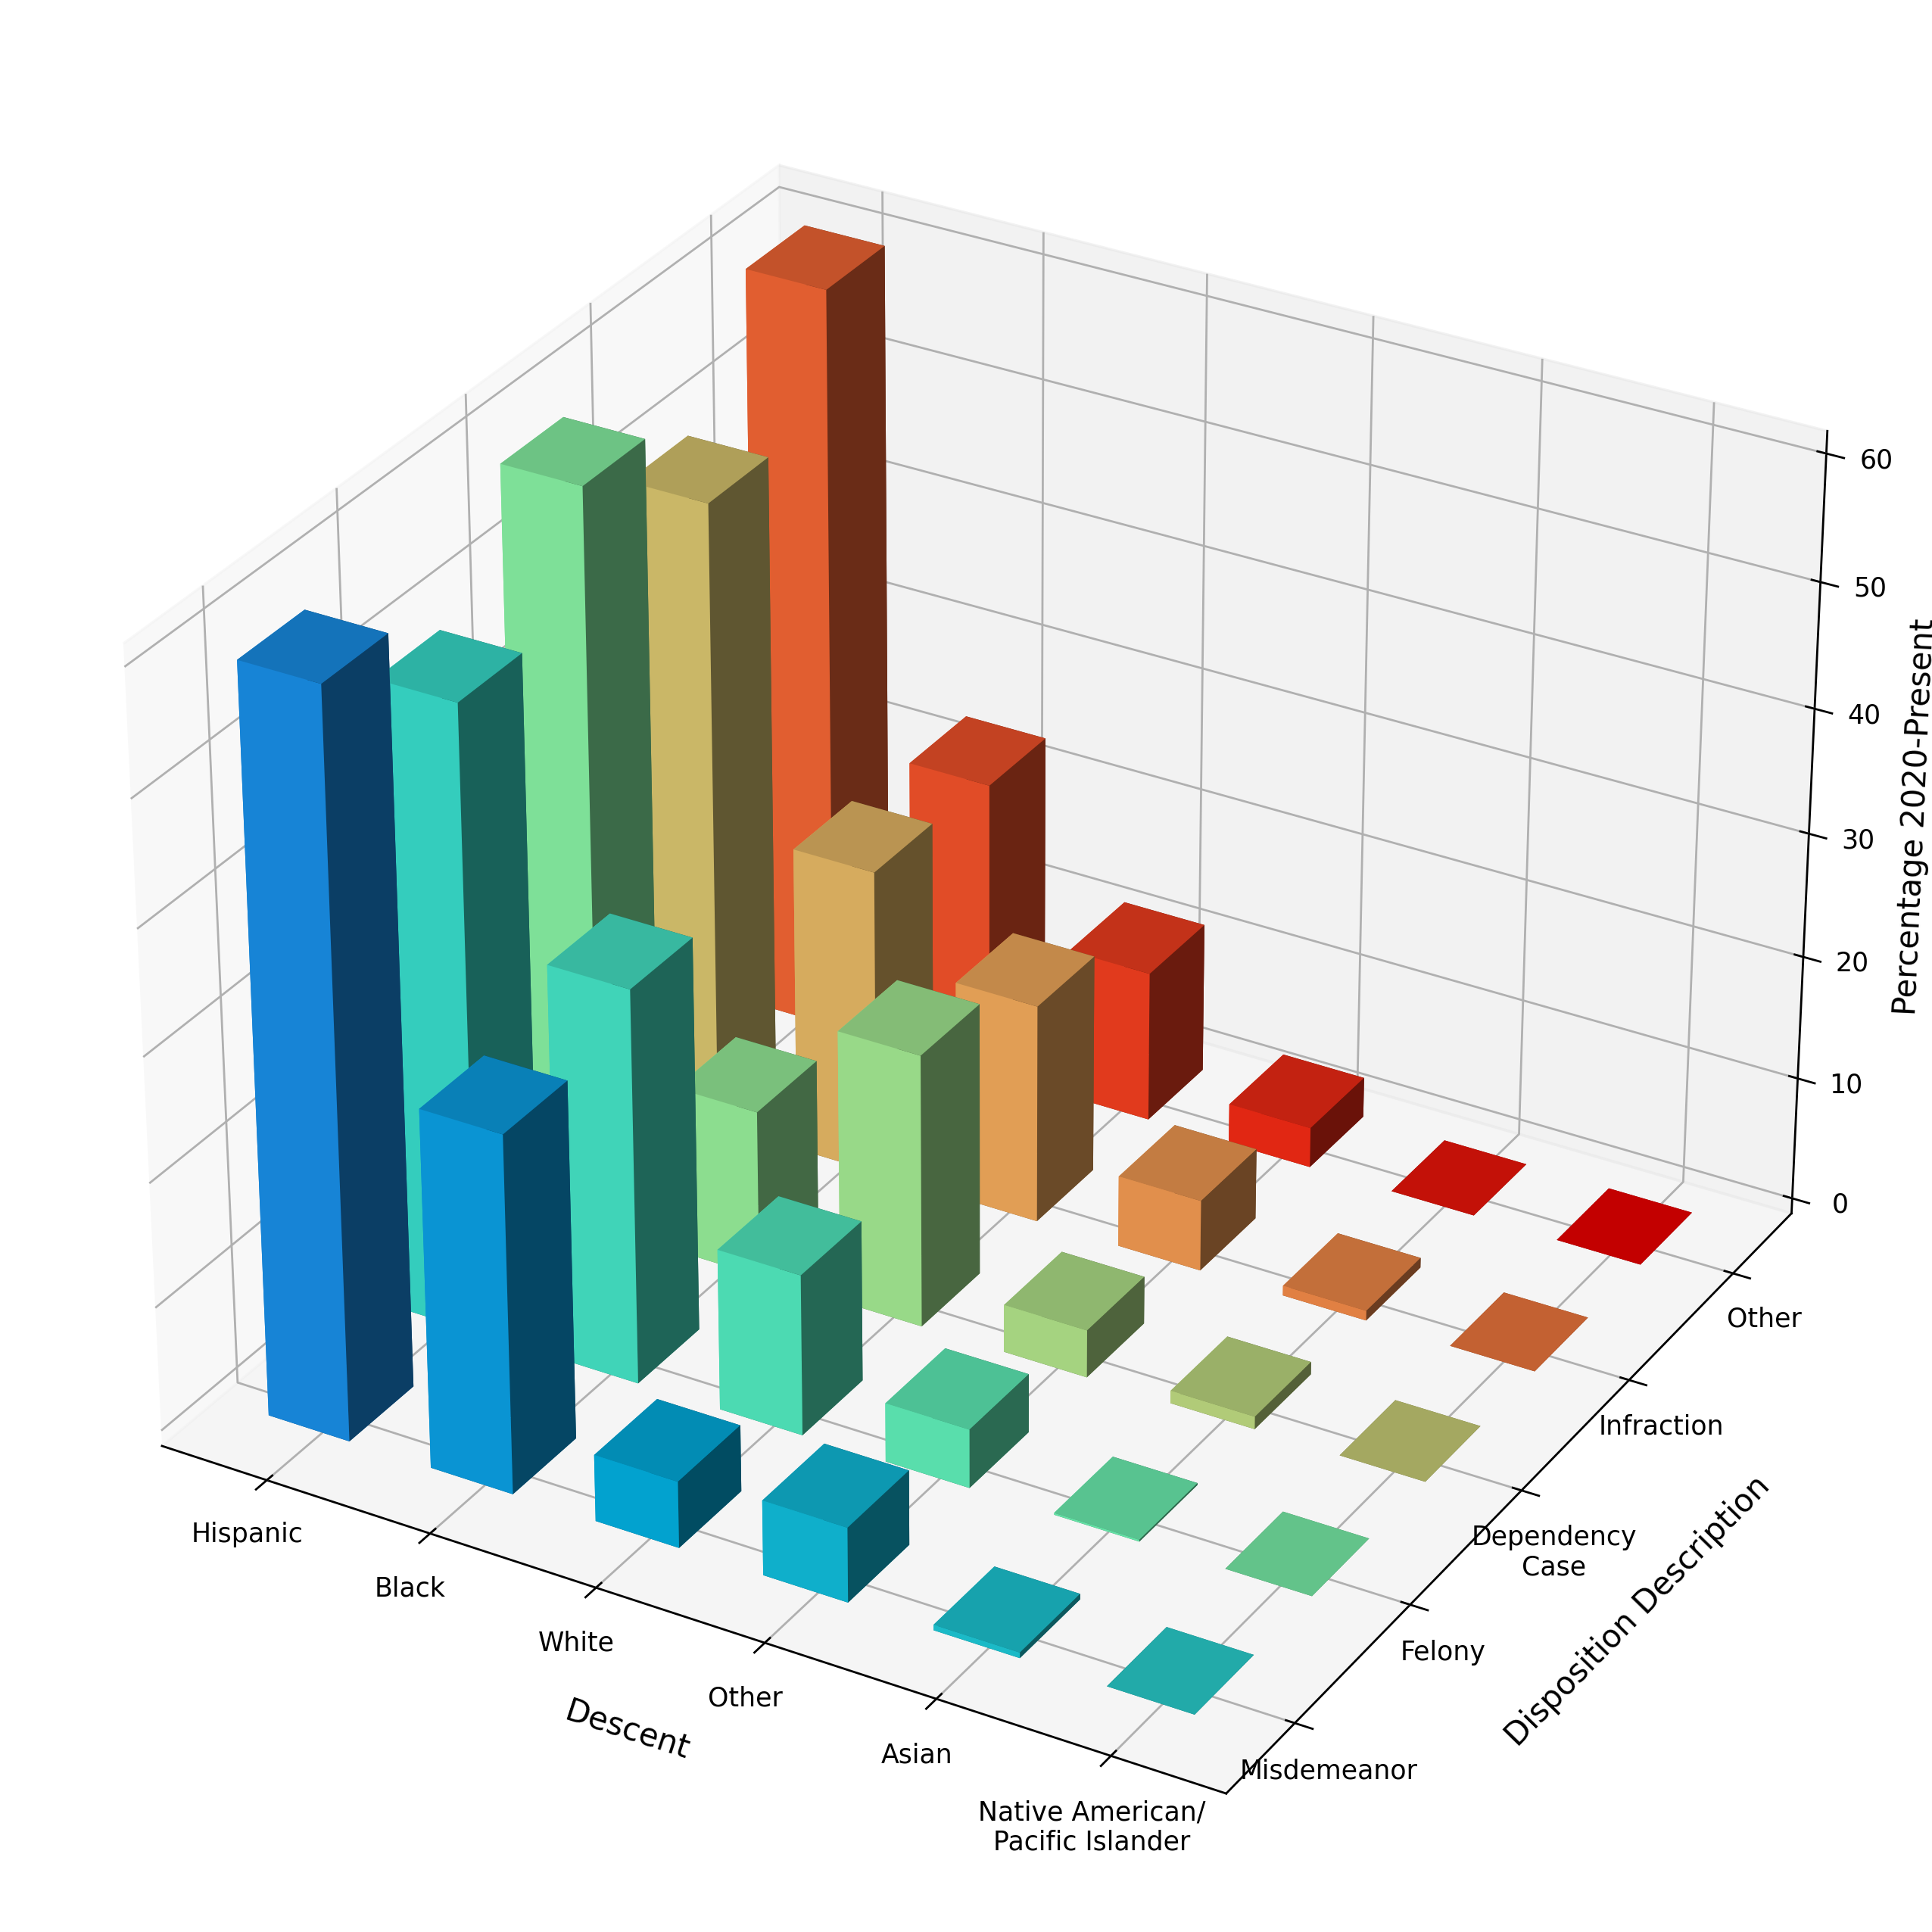

In [ ]:
#3D Bar Chart

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#Set up colors, labels for axes, position of each element, and provide data to result from the percentages array
result = np.array(result, dtype=np.float)
colors = ['r','b','g','y','b','p']
fig=plt.figure(figsize=(13, 13), dpi=250)
ax1=fig.add_subplot(111, projection='3d')
ax1.set_xlabel('Descent', labelpad=10)
ax1.set_ylabel('Disposition Description', labelpad=20)
ax1.set_zlabel('Percentage 2020-Present')
xlabels = np.array(['Hispanic', 'Black', 'White','Other', 'Asian', 'Native American/\nPacific Islander'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['Misdemeanor','Felony','Dependency\nCase','Infraction','Other'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)
zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)

ax1.xaxis.label.set_fontsize(12)
ax1.yaxis.label.set_fontsize(12)
ax1.zaxis.label.set_fontsize(12)

values = np.linspace(0.2, 1, xposM.ravel().shape[0])#colors setting the shade for each
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)#setting position and color of each bar
plt.show()

In [ ]:
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(two_way_table)#two_way_table is the data, not the percentages

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")

chi2 statistic:     3596.1
p-value:            0
degrees of freedom: 30




                      N     Mean       SD      SE  95% Conf.  Interval
Arrest Type Code                                                      
D                   449   8.3898   5.7354  0.2707     7.8578    8.9217
F                 91084  34.1359  11.4001  0.0378    34.0618   34.2099
I                 13073  40.3683  12.9367  0.1131    40.1465   40.5901
M                 78068  36.0155  12.4128  0.0444    35.9285   36.1026
O                  1865  32.3651  12.7550  0.2954    31.7859   32.9444


<Axes: title={'center': 'Age'}, xlabel='Arrest Type Code'>

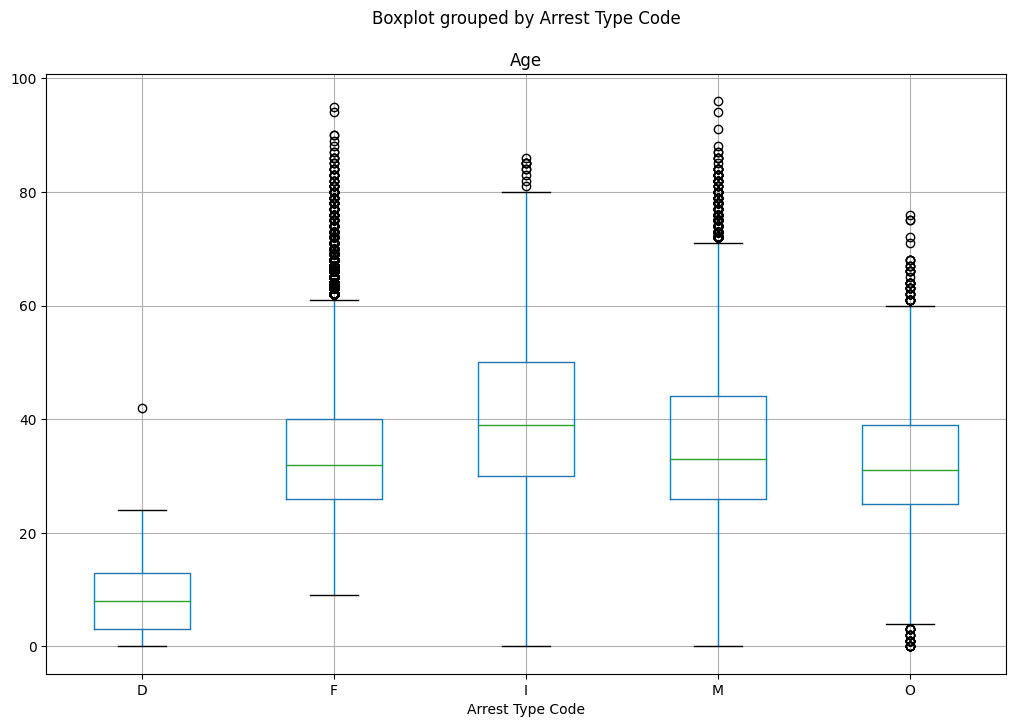

In [ ]:
#2020-Present One Way ANOVA test

import researchpy as rp
import scipy.stats as stats
from scipy.stats import f_oneway

print(rp.summary_cont(data_2020_Present['Age'].groupby(data_2020_Present['Arrest Type Code'])))

performance1 = data_2020_Present['Age'][data_2020_Present['Arrest Type Code'] == 'D']
performance2 = data_2020_Present['Age'][data_2020_Present['Arrest Type Code'] == 'F']
performance3 = data_2020_Present['Age'][data_2020_Present['Arrest Type Code'] == 'I']
performance4 = data_2020_Present['Age'][data_2020_Present['Arrest Type Code'] == 'M']
performance5 = data_2020_Present['Age'][data_2020_Present['Arrest Type Code'] == 'O']

f_oneway(performance1, performance2, performance3, performance4, performance5)

data_2020_Present.boxplot('Age', by='Arrest Type Code', figsize=(12, 8))


# Data Representations for 2010 to 2019:




In [ ]:
#Get the file
import pandas as pd

file = '/content/drive/MyDrive/Arrest_Data_from_2010_to_2019.csv' # replace the path of file you want to access
lapd_2010_2019_df = pd.read_csv(file)
lapd_2010_2019_df.head()

,Report ID,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Booking Date,Booking Time,Booking Location,Booking Location Code,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,2377805,BOOKING,06/22/2010,1845.0,16,Foothill,1664,46,F,W,...,06/22/2010 12:00:00 AM,2108.0,VALLEY - JAIL DIV,4279.0,19335.0,155.0,1371.0,NaN,3.0,21.0
1,121920046,RFC,09/28/2012,930.0,19,Mission,1998,60,M,H,...,NaN,NaN,NaN,NaN,19730.0,151.0,462.0,NaN,3.0,59.0
2,101820989,RFC,10/20/2010,700.0,18,Southeast,1829,14,M,H,...,NaN,NaN,NaN,NaN,24030.0,376.0,589.0,13.0,11.0,92.0
3,90712341,RFC,03/10/2011,940.0,7,Wilshire,776,45,M,B,...,NaN,NaN,NaN,NaN,23080.0,651.0,1106.0,NaN,12.0,69.0
4,121909585,RFC,04/01/2012,1715.0,19,Mission,1993,37,M,H,...,NaN,NaN,NaN,NaN,19730.0,141.0,424.0,NaN,3.0,59.0


In [ ]:
import pandas as pd
import csv

lapd_2010_2019_df_replicate = pd.DataFrame(lapd_2010_2019_df, columns=['Report Type','Arrest Date','Time','Area ID','Area Name','Reporting District','Age','Sex Code','Descent Code','Arrest Type Code','Disposition Description'])
lapd_2010_2019_df_replicate

,Report Type,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Arrest Type Code,Disposition Description
0,BOOKING,06/22/2010,1845.0,16,Foothill,1664,46,F,W,F,MISDEMEANOR COMPLAINT FILED
1,RFC,09/28/2012,930.0,19,Mission,1998,60,M,H,M,MISDEMEANOR COMPLAINT FILED
2,RFC,10/20/2010,700.0,18,Southeast,1829,14,M,H,M,NaN
3,RFC,03/10/2011,940.0,7,Wilshire,776,45,M,B,M,MISDEMEANOR COMPLAINT FILED
4,RFC,04/01/2012,1715.0,19,Mission,1993,37,M,H,M,MISDEMEANOR COMPLAINT FILED
...,...,...,...,...,...,...,...,...,...,...,...
1321057,BOOKING,01/01/2018,1950.0,16,Foothill,1676,36,M,H,F,FELONY COMPLAINT FILED
1321058,BOOKING,11/02/2018,900.0,3,Southwest,391,39,M,H,F,CITY ATTORNEY REJECT
1321059,BOOKING,02/10/2019,1015.0,3,Southwest,303,23,F,B,F,CITY ATTORNEY REJECT
1321060,BOOKING,02/10/2019,1015.0,3,Southwest,303,25,F,B,F,CITY ATTORNEY REJECT


In [ ]:

#cleaning data for NaN values and saving as .csv
lapd_2010_2019_df_replic = lapd_2010_2019_df_replicate.dropna()
lapd_2010_2019_df_replicate =lapd_2010_2019_df_replic[lapd_2010_2019_df_replic['Arrest Type Code'] != '1']
lapd_2010_2019_df_replicate.reset_index(drop=True)

#lapd_df_replicate.DataFrame.describe
lapd_2010_2019_df_replicate.to_csv(r'Clean_Data.csv')

#create 2-way table between discent code & disposition description
data_2010_2019 = pd.read_csv("Clean_Data.csv")
grouped_df = data_2010_2019.groupby(['Descent Code', 'Arrest Type Code'])
counts = grouped_df['Descent Code'].size()
#print(counts)


#Different data description characteristics
#print(data_2010_2019['Disposition Description'].describe())
#print(data_2010_2019['Descent Code'].describe())
#print(data_2010_2019['Disposition Description'].value_counts())
print(data_2010_2019['Arrest Type Code'].value_counts())
#print(data_2010_2019['Descent Code'].value_counts())
#data_2010_2019['Disposition Description'].value_counts()

M    732970
F    395245
I     55863
O     26989
D      3866
Name: Arrest Type Code, dtype: int64


In [ ]:
#Chi-Squaree Test
two_way_table=pd.crosstab(data_2010_2019['Disposition Description'],data_2010_2019['Descent Code'])
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(two_way_table)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
#print("expected frequencies:\n",expected)

chi2 statistic:     38390
p-value:            0
degrees of freedom: 432


In [ ]:
#Chi-square test for 3D Graph
two_way_table = pd.crosstab(data_2010_2019['Arrest Type Code'],data_2010_2019['Descent Code'], margins = True)

#Combining columns
two_way_table['Other'] = two_way_table['O'] + two_way_table['X']
two_way_table['Asian'] = two_way_table['V'] + two_way_table['A'] + two_way_table['K'] + two_way_table['F'] + two_way_table['C'] + two_way_table['J'] + two_way_table['L'] + two_way_table['Z'] + two_way_table['D']
two_way_table['NAPI'] = two_way_table['P'] + two_way_table['G'] + two_way_table['S'] + two_way_table['U'] + two_way_table['I']

#Dropping and renaming columns
two_way_table.drop(['A', 'K', 'F', 'C', 'J', 'L', 'Z', 'D','P', 'G', 'S', 'U', 'I','O','X','V'], axis='columns', inplace = True)
two_way_table.rename(columns = {'B':'Black','H':'Hispanic','W':'White'}, inplace = True)
two_way_table = two_way_table[['Hispanic','Black','White','Other','Asian','NAPI','All']]

#two_way_table
two_way_table_array_2010 = two_way_table.to_numpy()
two_way_table_array_2010

array([[   2511,     876,     313,     154,      10,       2,    3866],
       [ 176702,  133454,   64842,   19565,     563,     119,  395245],
       [  23845,   12498,   16829,    2067,     599,      25,   55863],
       [ 343461,  199253,  146771,   36288,    6883,     314,  732970],
       [  11947,   10482,    3877,     655,      21,       7,   26989],
       [ 558466,  356563,  232632,   58729,    8076,     467, 1214933]])

In [ ]:
#values before calculating percentages
result2=[['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0'],
        ['0', '0', '0', '0', '0','0']]

#convert to proportions (horizontally), get rid of "all" categories
for i in range(0, 5):
  for j in range(0,5):
    result2[i][j]=((two_way_table_array_2010[i][j])/(two_way_table_array_2010[i][6]))*100

result2

[[64.95085359544748,
  22.659079151577856,
  8.09622348680807,
  3.983445421624418,
  0.2586652871184687,
  '0'],
 [44.706953914660524,
  33.764880011132334,
  16.405520626446886,
  4.950094245341497,
  0.14244329466533417,
  '0'],
 [42.68478241412026,
  22.37259008646152,
  30.125485562894937,
  3.7001235164599104,
  1.0722660795159589,
  '0'],
 [46.85880731817127,
  27.184332237335774,
  20.024148328035256,
  4.950816540922548,
  0.9390561687381475,
  '0'],
 [44.26618251880396,
  38.8380451294972,
  14.365111712179035,
  2.4269146689391974,
  0.07780947793545519,
  '0']]

<ipython-input-22-77c62df8b73b>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result2 = np.array(result2, dtype=np.float)
<ipython-input-22-77c62df8b73b>:29: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax1.w_xaxis.set_ticks(xpos + dx/2.)
<ipython-input-22-77c62df8b73b>:30: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax1.w_xaxis.set_ticklabels(xlabels)
<ipython-input-22-77c62df8b73b>:32: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be 

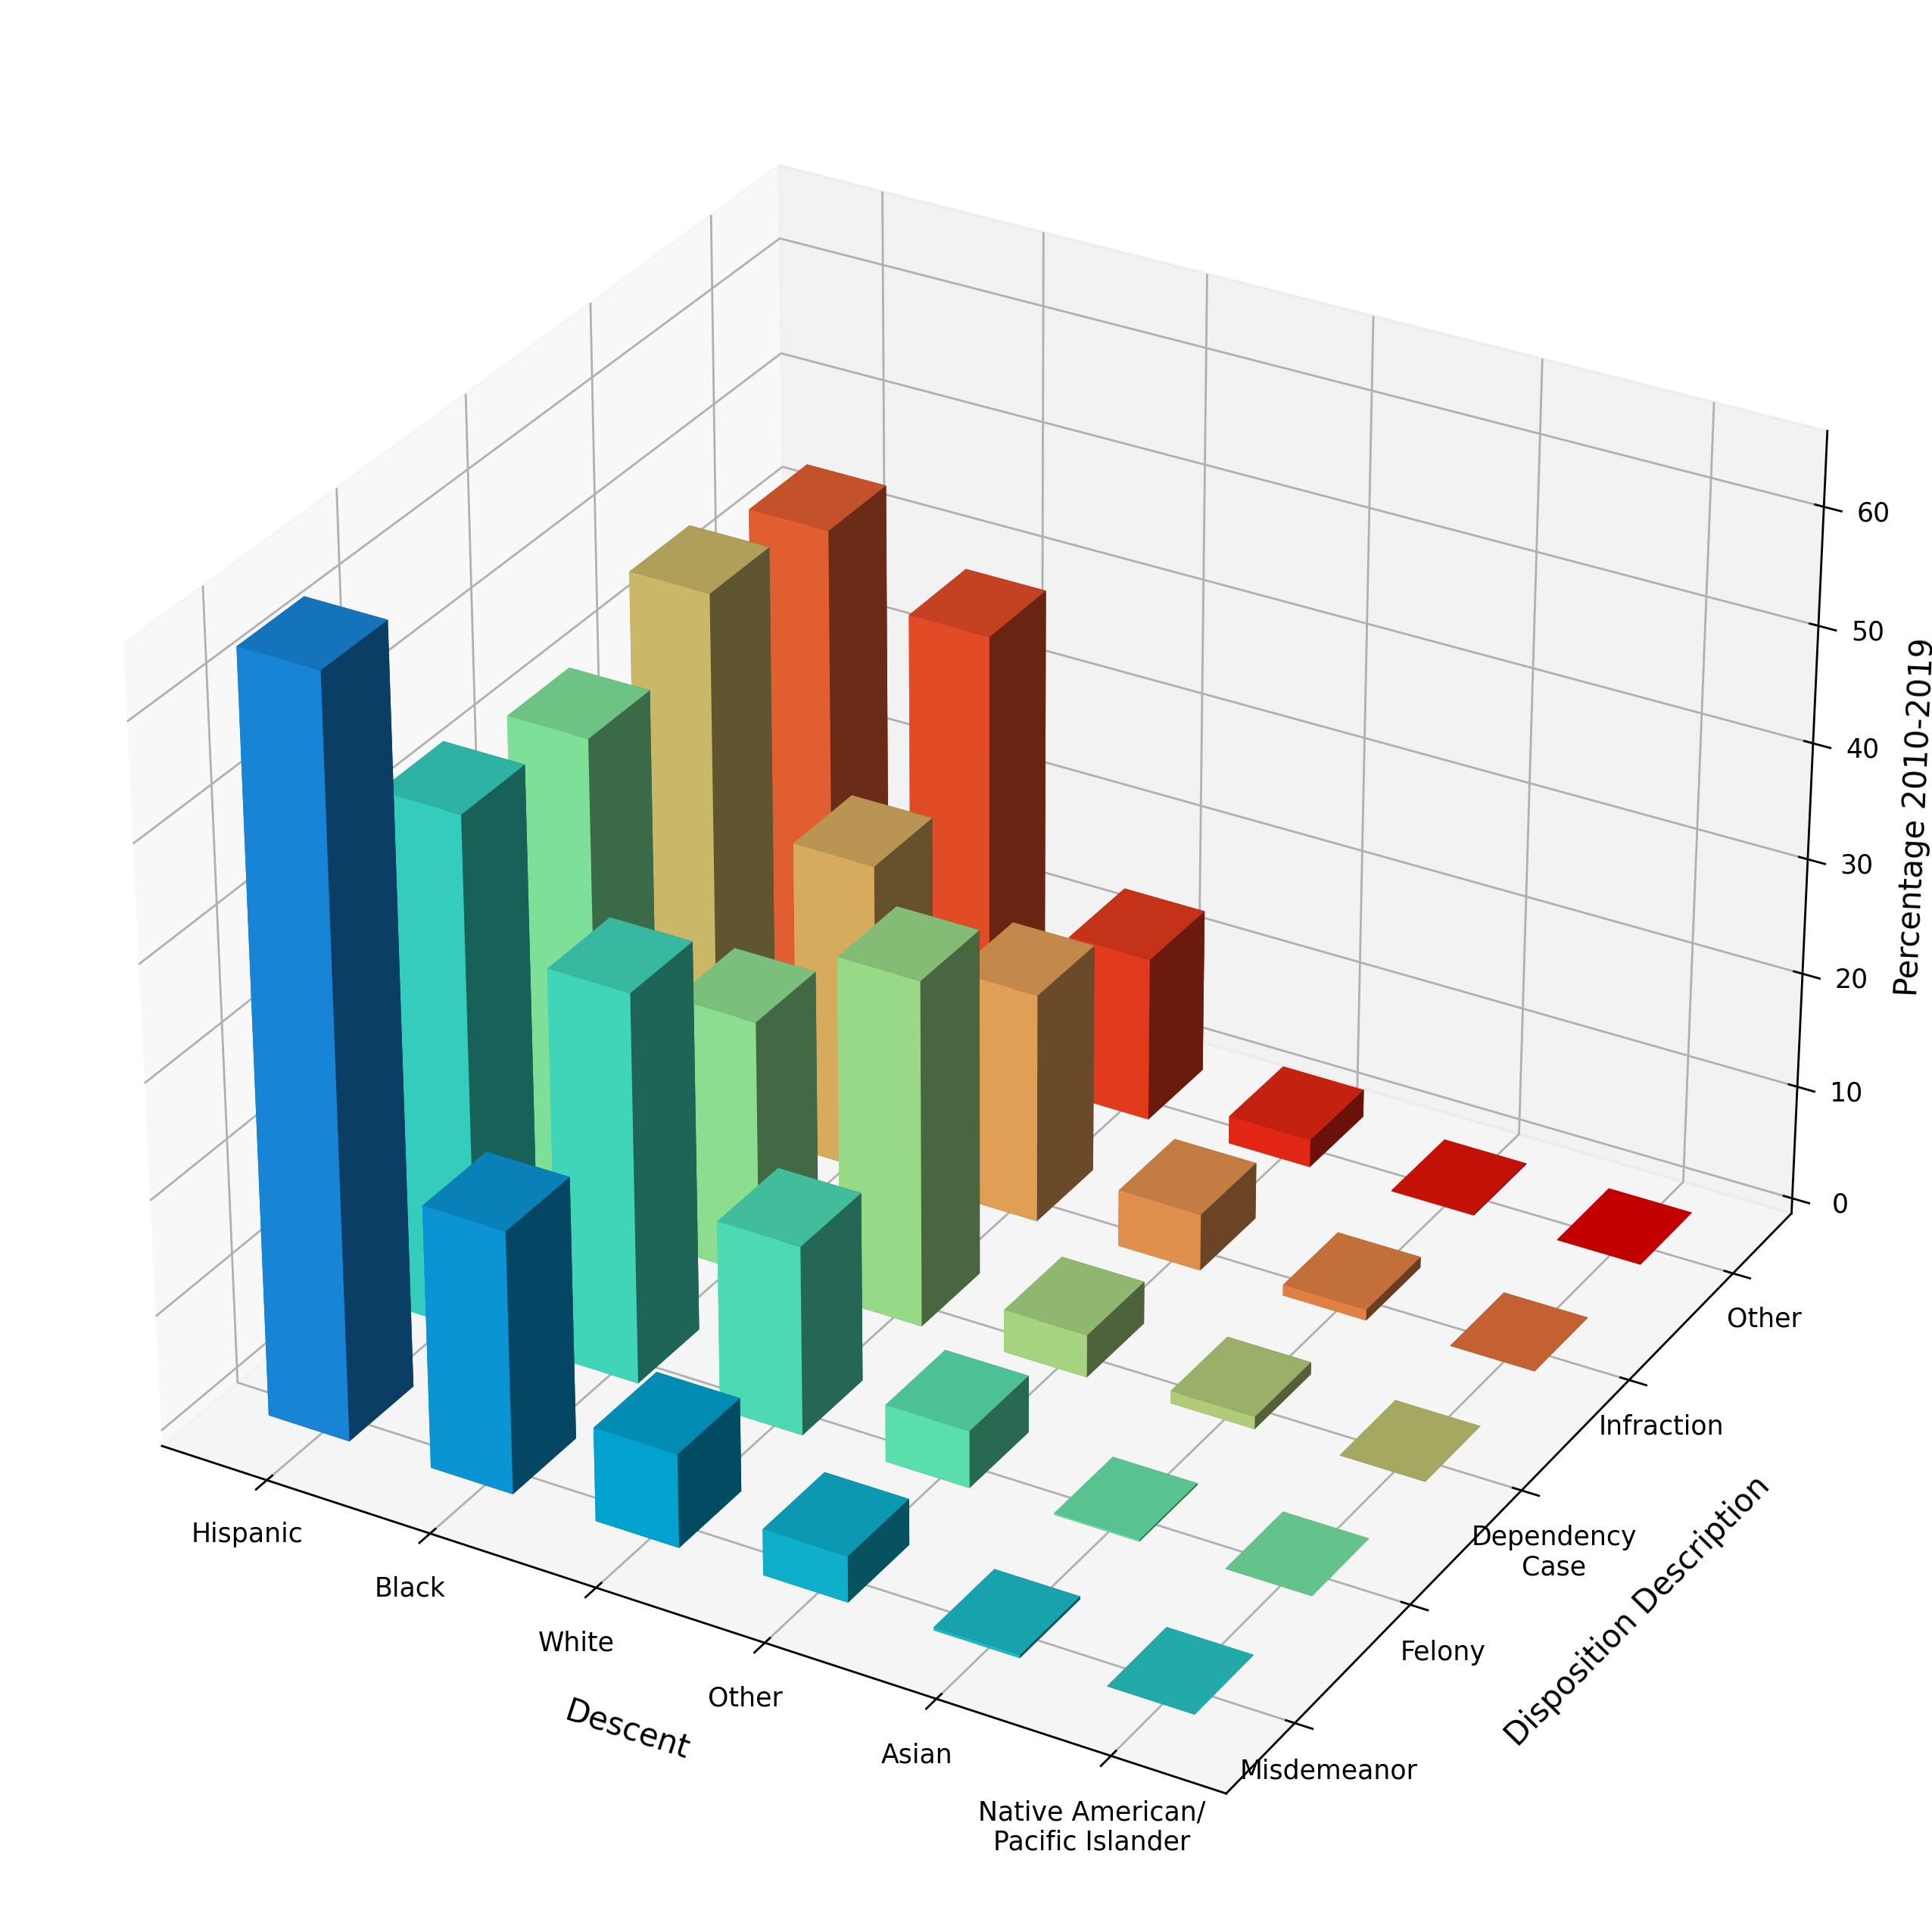

In [ ]:
#3D Bar Chart for 2010-2019

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#Set up colors, labels for axes, position of each element, and provide data to result from the percentages array
result2 = np.array(result2, dtype=np.float)
colors = ['r','b','g','y','b','p']
fig=plt.figure(figsize=(13, 13), dpi=250)
ax1=fig.add_subplot(111, projection='3d')
ax1.set_xlabel('Descent', labelpad=10)
ax1.set_ylabel('Disposition Description', labelpad=20)
ax1.set_zlabel('Percentage 2010-2019')
xlabels = np.array(['Hispanic', 'Black', 'White','Other', 'Asian', 'Native American/\nPacific Islander'])#hispanic, black, white, other, asian, native american/pacific islander
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['Misdemeanor','Felony','Dependency\nCase','Infraction','Other'])

ypos = np.arange(ylabels.shape[0])
xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result2
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)

ax1.xaxis.label.set_fontsize(12)
ax1.yaxis.label.set_fontsize(12)
ax1.zaxis.label.set_fontsize(12)

values = np.linspace(0.2, 1, xposM.ravel().shape[0])#colors setting the shade for each
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)#setting position and color of each bar
plt.show()



                       N     Mean       SD      SE  95% Conf.  Interval
Arrest Type Code                                                       
D                   3866   7.5202   5.5165  0.0887     7.3462    7.6941
F                 395245  33.9585  12.2684  0.0195    33.9203   33.9968
I                  55863  38.5548  14.1132  0.0597    38.4378   38.6718
M                 732970  35.3921  13.7384  0.0160    35.3606   35.4235
O                  26989  35.8043  13.2901  0.0809    35.6458   35.9629


<Axes: title={'center': 'Age'}, xlabel='Arrest Type Code'>

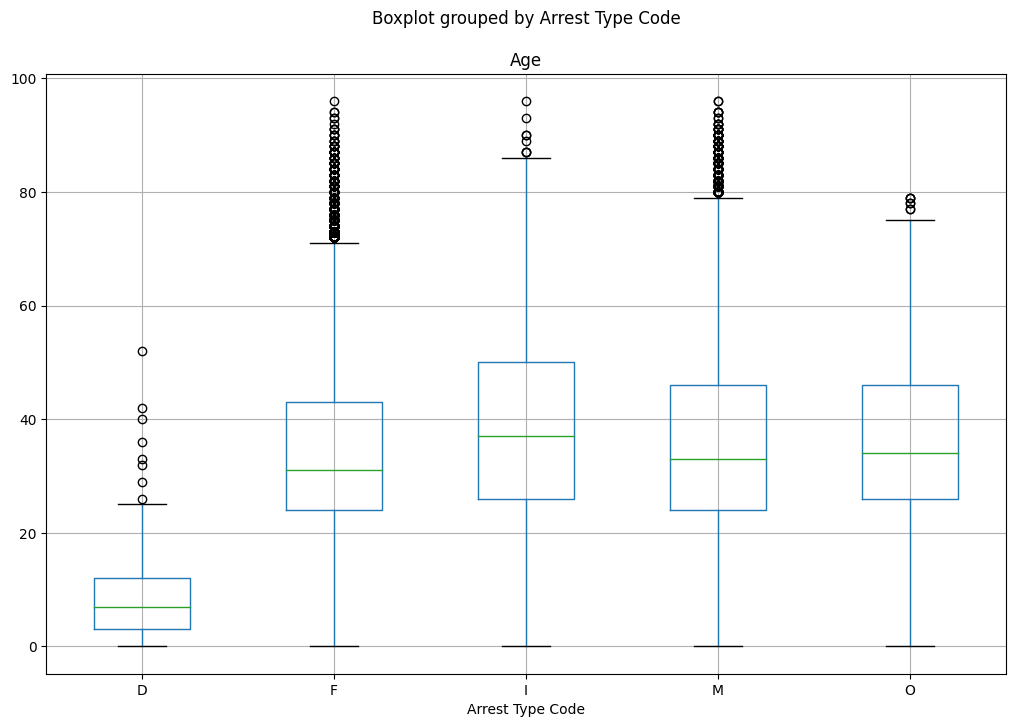

In [ ]:
#2010-2019 One Way ANOVA test

import researchpy as rp
import scipy.stats as stats
from scipy.stats import f_oneway

print(rp.summary_cont(data_2010_2019['Age'].groupby(data_2010_2019['Arrest Type Code'])))

performance1 = data_2010_2019['Age'][data_2010_2019['Arrest Type Code'] == 'D']
performance2 = data_2010_2019['Age'][data_2010_2019['Arrest Type Code'] == 'F']
performance3 = data_2010_2019['Age'][data_2010_2019['Arrest Type Code'] == 'I']
performance4 = data_2010_2019['Age'][data_2010_2019['Arrest Type Code'] == 'M']
performance5 = data_2010_2019['Age'][data_2010_2019['Arrest Type Code'] == 'O']

f_oneway(performance1, performance2, performance3, performance4, performance5)

data_2010_2019.boxplot('Age', by='Arrest Type Code', figsize=(12, 8))
